In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/YOLO_DL_Assignment7.zip' '/content/YOLO_DL_Assignment7.zip'

!unzip '/content/YOLO_DL_Assignment7.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/data/train/Trouser/19004.png  
 extracting: /content/data/train/Trouser/19009.png  
 extracting: /content/data/train/Trouser/1901.png  
 extracting: /content/data/train/Trouser/19020.png  
 extracting: /content/data/train/Trouser/19022.png  
 extracting: /content/data/train/Trouser/19029.png  
 extracting: /content/data/train/Trouser/19031.png  
 extracting: /content/data/train/Trouser/19034.png  
 extracting: /content/data/train/Trouser/19039.png  
 extracting: /content/data/train/Trouser/19045.png  
 extracting: /content/data/train/Trouser/19053.png  
 extracting: /content/data/train/Trouser/19058.png  
 extracting: /content/data/train/Trouser/19059.png  
 extracting: /content/data/train/Trouser/19061.png  
 extracting: /content/data/train/Trouser/19064.png  
 extracting: /content/data/train/Trouser/19071.png  
 extracting: /content/data/train/Trouser/19095.png  
 extracting: /content/data/train/Trouser/19103.pn

In [3]:
### 3. Install Ultralytics ###

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
### 4. Train model ###

import os

from ultralytics import YOLO

In [5]:
# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

100%|██████████| 5.31M/5.31M [00:00<00:00, 315MB/s]


In [8]:
# Use the model
results = model.train(data='/content/data/', epochs=2)  # train the model

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data/, epochs=2, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/data/train... 60000 images, 0 corrupt: 100%|██████████| 60000/60000 [00:10<00:00, 5699.08it/s]


train: New cache created: /content/data/train.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 5017.13it/s]


val: New cache created: /content/data/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/2     0.558G       2.32         16        224:   0%|          | 16/3750 [00:02<06:12, 10.03it/s]

        1/2     0.558G       2.34         16        224:   1%|          | 28/3750 [00:03<06:06, 10.16it/s]
100%|██████████| 755k/755k [00:00<00:00, 55.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:24<00:00, 12.61it/s]


                   all      0.885      0.999

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:24<00:00, 12.74it/s]

                   all      0.915      0.999



2 epochs completed in 0.243 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/data/train... found 60000 images in 10 classes ✅ 
val: None...
test: /content/data/test... found 10000 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:25<00:00, 12.19it/s]


                   all      0.915      0.999
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
results_df = pd.read_csv('runs/classify/train2/results.csv')

In [28]:
import pandas as pd

# Replace 'exp' with the correct folder name
results_df = pd.read_csv('runs/classify/train2/results.csv')

# Display the first few rows and the column names
print("Columns in results.csv:", results_df.columns)
print(results_df.head())

Columns in results.csv: Index(['                  epoch', '             train/loss',
       '  metrics/accuracy_top1', '  metrics/accuracy_top5',
       '               val/loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')
                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.84255                    0.885   
1                        2                  0.37821                    0.915   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                   0.9988                   1.6104                 0.000238   
1                   0.9991                   1.5751                 0.000240   

                    lr/pg1                   lr/pg2  
0                 0.000238                 0.000238  
1                 0.000240                 0.000240  


In [29]:
# Clean the column names by stripping leading and trailing spaces
results_df.columns = results_df.columns.str.strip()

# Verify the cleaned column names
print("Cleaned Columns in results.csv:", results_df.columns)

Cleaned Columns in results.csv: Index(['epoch', 'train/loss', 'metrics/accuracy_top1', 'metrics/accuracy_top5',
       'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


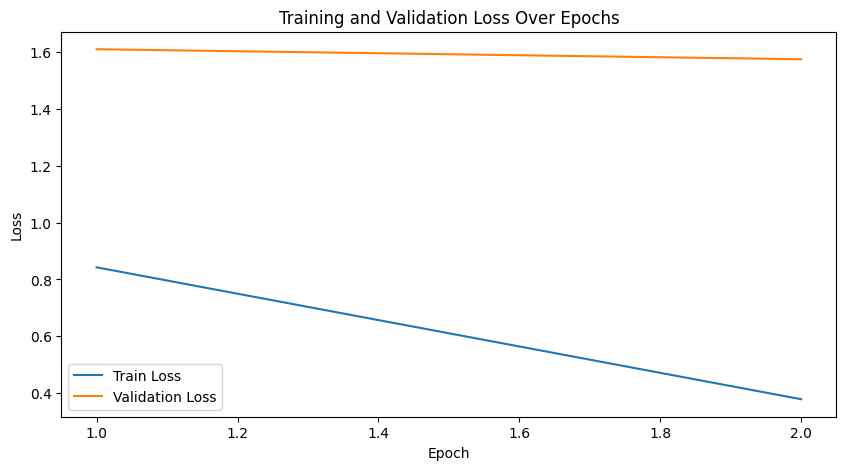

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['train/loss'], label='Train Loss')
plt.plot(results_df['epoch'], results_df['val/loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

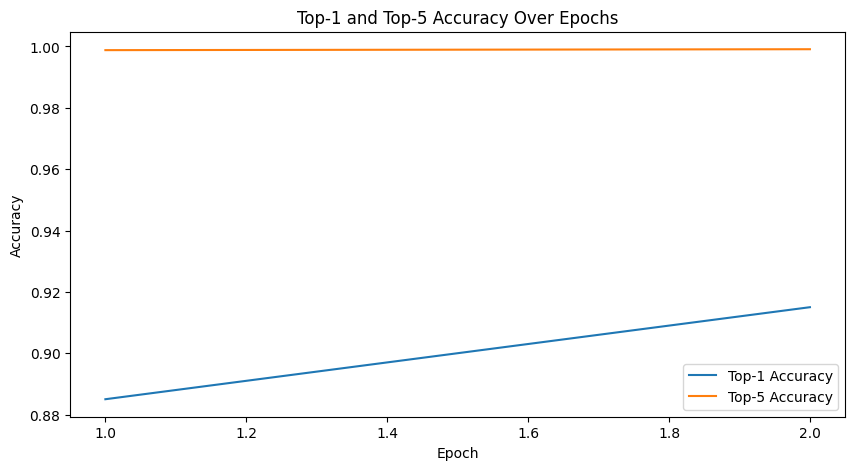

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/accuracy_top1'], label='Top-1 Accuracy')
plt.plot(results_df['epoch'], results_df['metrics/accuracy_top5'], label='Top-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top-1 and Top-5 Accuracy Over Epochs')
plt.legend()
plt.show()